In [ ]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import metrics
from mobilenetv2 import MobileNetV2_DANN

In [3]:
path = '/Users/irashokar/documents/NOvA_2/files/Feb_test_ii/dann_new/dann_0_5/'
with open(path + 'history_32_Adam_dann_0_5__100.pkl','rb') as f1:
    history = pkl.load(f1)

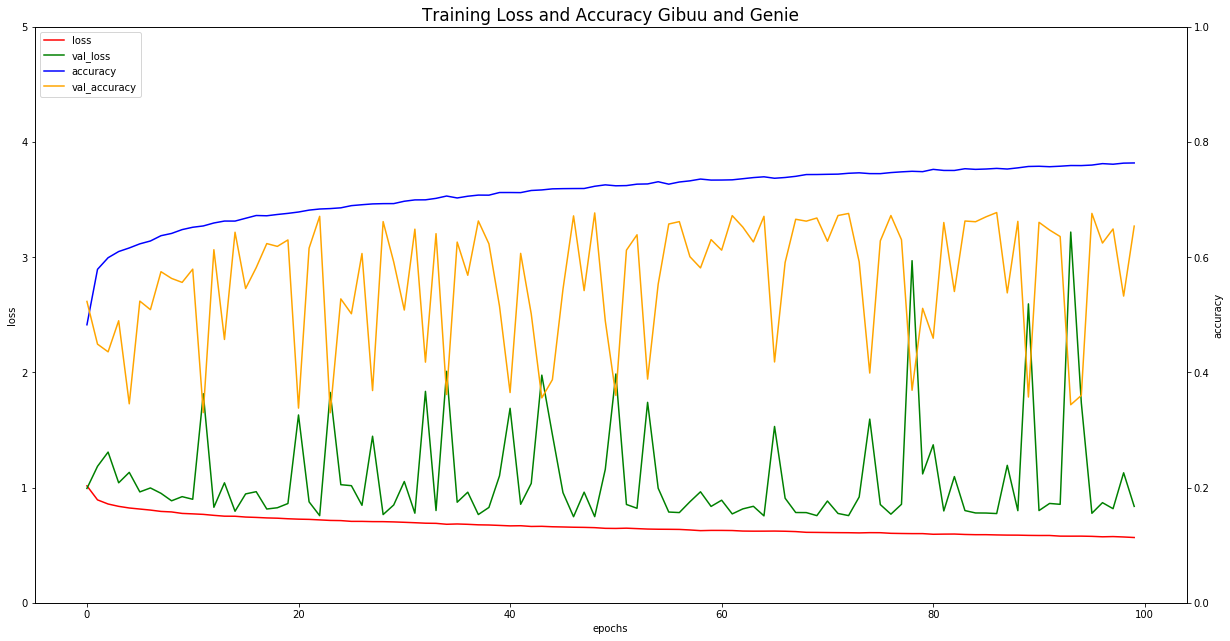

In [4]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx() 


lns1 = ax1.plot(history.history['output_loss'], color='red', label='loss')
lns2 = ax1.plot(history.history['val_output_loss'], color='green', label='val_loss')

lns3 = ax2.plot(history.history['output_accuracy'], color='blue', label='accuracy')
lns4 = ax2.plot(history.history['val_output_accuracy'], color='orange', label='val_accuracy')

leg = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')
plt.title('', fontsize=20)

plt.rcParams.update({'font.size': 14})

ax1.set_ylim(0.0, 5)
ax1.set_ylabel('loss')

ax2.set_ylim(0.0, 1)
ax2.set_ylabel('accuracy')

ax1.set_xlabel('epochs')
ax1.set_title('Training Loss and Accuracy Gibuu and Genie')

plt.show()


In [5]:
with open(path+ 'test_probabilities_genie_on_genie__32_Adam_dann_0_5__100.pkl','rb') as f2:
    probabilities = pkl.load(f2)
with open(path+ 'nodes_values_genie_on_genie__32_Adam_dann_0_5__100.pkl','rb') as f6:
    node_values = pkl.load(f6)
with open(path+ 'test_df_genie_on_genie__32_Adam_dann_0_5__100.pkl','rb') as f6:
    df = pkl.load(f6)
labels = list(df['label'])
gibuu_weights = list(df['weight'])

In [6]:
predictions = []
for i, j in probabilities:
    nc = i[0][0]
    nu_e = i[0][1]
    nu_mu = i[0][2]
    if nc>= nu_e and nc>=nu_mu:
        predictions.append(0)
    elif nu_e>= nc and nu_e>=nu_mu:
        predictions.append(1)
    elif nu_mu>= nu_e and nu_mu>=nc:
        predictions.append(2)
    
def sub(x):
    return x-1

test_vals = list(map(sub, labels))
    

#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.663665194246234 

[array([[1.5495178e-04, 3.0610438e-05, 9.9981445e-01]], dtype=float32), array([[0.37110326, 0.6288968 ],
       [0.37110326, 0.6288968 ]], dtype=float32)] 

[array([[0.465075  , 0.27739078, 0.25753415]], dtype=float32), array([[0.5018976, 0.4981024],
       [0.5018976, 0.4981024]], dtype=float32)] 

[array([[3.4759706e-04, 5.9521517e-05, 9.9959284e-01]], dtype=float32), array([[0.37316936, 0.6268307 ],
       [0.37316936, 0.6268307 ]], dtype=float32)] 

[array([[0.10271432, 0.19996673, 0.6973189 ]], dtype=float32), array([[0.46853068, 0.5314693 ],
       [0.46853068, 0.5314693 ]], dtype=float32)] 

[array([[0.6968576 , 0.13455018, 0.16859214]], dtype=float32), array([[0.5278348, 0.4721652],
       [0.5278348, 0.4721652]], dtype=float32)] 

[array([[0.07780041, 0.05542681, 0.8667728 ]], dtype=float32), array([[0.4466175, 0.5533825],
       [0.4466175, 0.5533825]], dtype=float32)] 

[array([[0.63393784, 0.22543404, 0.14062808]], dtype=float32

Text(0, 0.5, 'Count')

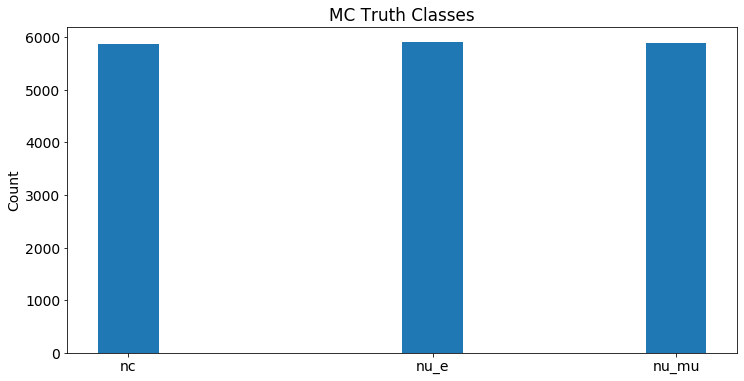

In [7]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.1, 1.1, 1.9]
class_names = ['nc', 'nu_e', 'nu_mu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

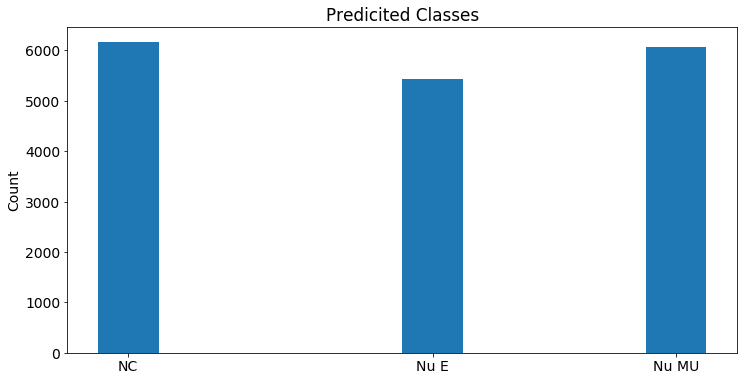

In [8]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

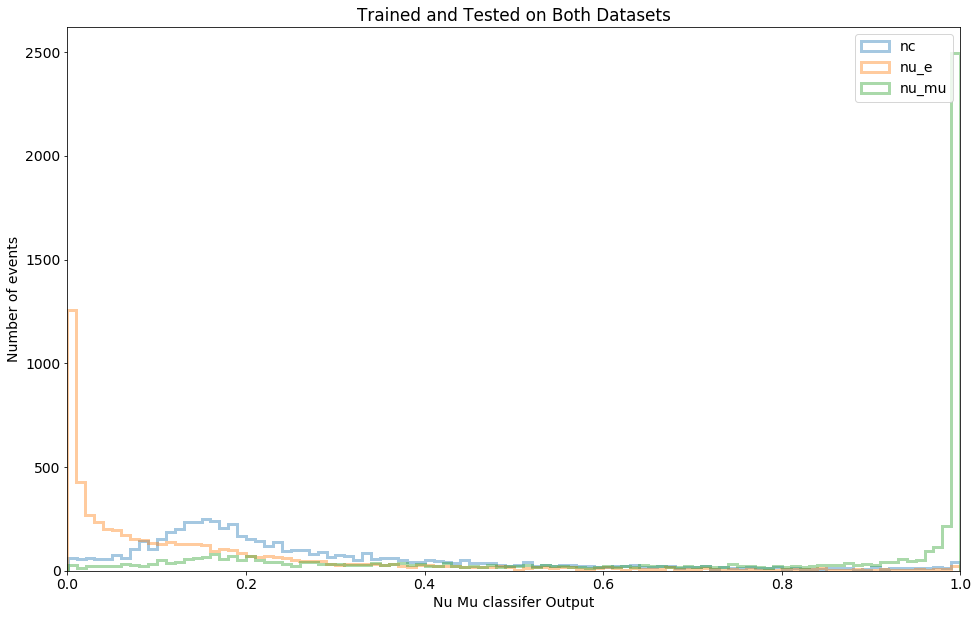

In [9]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0 :
        nc.append(probabilities[i][0][0][2])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i][0][0][2])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i][0][0][2])
        
plt.figure(figsize=(16,10))
g = sns.distplot(nc, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(mu_e, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(nu_mu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
plt.title('Trained and Tested on Both Datasets')
g.set(xlim=(0,1))

In [1]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i][0][0][1])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i][0][0][1])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i][0][0][1])
        
plt.figure(figsize=(16,10))
g = sns.distplot(nc, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(mu_e, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(nu_mu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
plt.title('Trained and Tested on Both Datasets')
g.set(ylim=(0,5000))
g.set(xlim=(0,1))

NameError: name 'probabilities' is not defined

In [11]:
purity_list = []
efficiency_list = []
p_x_e_list = []

#gibuu_weights=[float(i) for i in gibuu_weights]
gibuu_weights=[int(i)/10 for i in gibuu_weights]
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i][0][0][2]>=j:
                nu_mu_above.append(probabilities[i][0][0][2]*gibuu_weights[i])
            elif probabilities[i][0][0][2]<=j:
                nu_mu_below.append(probabilities[i][0][0][2]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i][0][0][2]>=j:
                nc_above.append(probabilities[i][0][0][2]*gibuu_weights[i])
            elif probabilities[i][0][0][2]<=j:
                nc_below.append(probabilities[i][0][0][2]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i][0][0][2]>=j:
                nu_e_above.append(probabilities[i][0][0][2]*gibuu_weights[i])
            elif probabilities[i][0][0][2]<=j:
                nu_e_below.append(probabilities[i][0][0][2]*gibuu_weights[i])
                
        
                
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


In [12]:
pkl.dump( p_x_e_list, open( "dann_0_5_mu.pkl", "wb" ) )

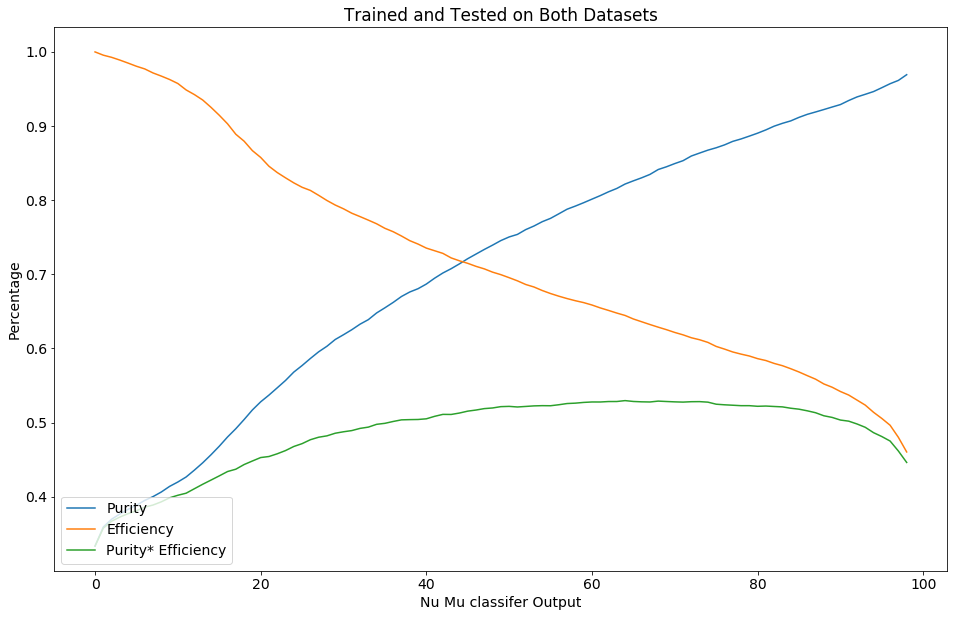

In [13]:
plt.figure(figsize=(16,10))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.title('Trained and Tested on Both Datasets')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [14]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i][0][0][1]>=j:
                nu_mu_above.append(probabilities[i][0][0][1]*gibuu_weights[i])
            elif probabilities[i][0][0][1]<=j:
                nu_mu_below.append(probabilities[i][0][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i][0][0][1]>=j:
                nc_above.append(probabilities[i][0][0][1]*gibuu_weights[i])
            elif probabilities[i][0][0][1]<=j:
                nc_below.append(probabilities[i][0][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i][0][0][1]>=j:
                nu_e_above.append(probabilities[i][0][0][1]*gibuu_weights[i])
            elif probabilities[i][0][0][1]<=j:
                nu_e_below.append(probabilities[i][0][0][1]*gibuu_weights[i])
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    

In [15]:
pkl.dump( p_x_e_list, open( "dann_0_5_e.pkl", "wb" ) )

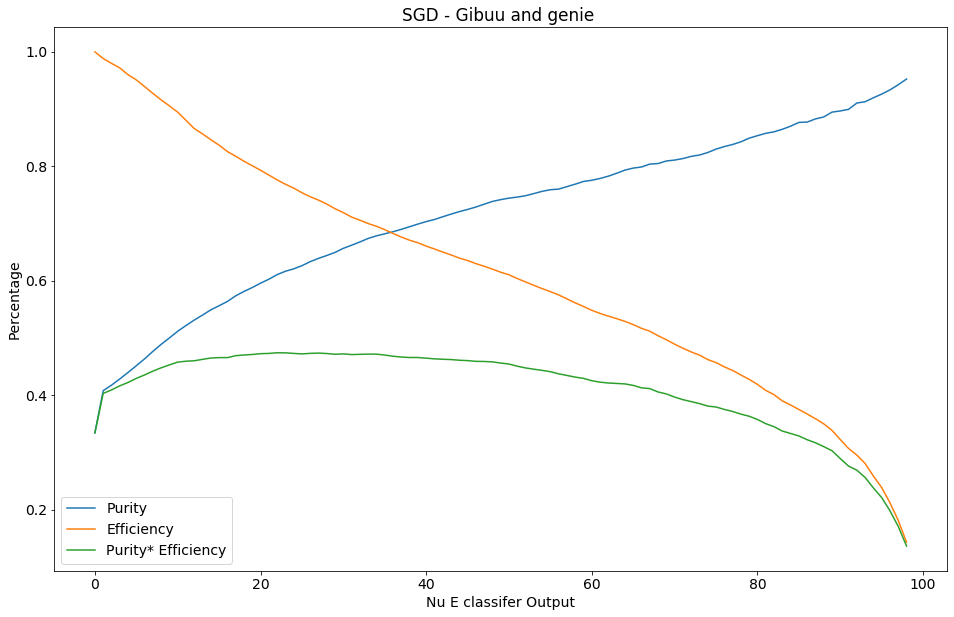

In [16]:
plt.figure(figsize=(16,10))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie ')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [17]:
pr_nc, pr_nu_e, pr_nu_mu = [], [], []
pr_nc_genie, pr_nu_e_genie, pr_nu_mu_genie = [], [], []
pr_nc_gibuu, pr_nu_e_gibuu, pr_nu_mu_gibuu = [], [], []
test_vals_genie, test_vals_gibuu  = [], []

for i in range(len(probabilities)):
    if '_gibuu_' in df['file'][i]:
        pr_nc_gibuu.append(probabilities[i][0][0][0])
        pr_nu_e_gibuu.append(probabilities[i][0][0][1])
        pr_nu_mu_gibuu.append(probabilities[i][0][0][2])
        test_vals_gibuu.append(test_vals[i])
    else:
        pr_nc_genie.append(probabilities[i][0][0][0])
        pr_nu_e_genie.append(probabilities[i][0][0][1])
        pr_nu_mu_genie.append(probabilities[i][0][0][2])
        test_vals_genie.append(test_vals[i])
        
    pr_nc.append(probabilities[i][0][0][0])
    pr_nu_e.append(probabilities[i][0][0][1])
    pr_nu_mu.append(probabilities[i][0][0][2])

nc_fpr, nc_tpr, nc_thresholds = metrics.roc_curve(test_vals, pr_nc, pos_label=0)
nu_e_fpr, nu_e_tpr, nu_e_thresholds = metrics.roc_curve(test_vals, pr_nu_e, pos_label=1)
nu_mu_fpr, nu_mu_tpr, nu_mu_thresholds = metrics.roc_curve(test_vals, pr_nu_mu, pos_label=2)    
    
genie_nc_fpr, genie_nc_tpr, genie_nc_thresholds = metrics.roc_curve(test_vals_genie, pr_nc_genie, pos_label=0)
genie_nu_e_fpr, genie_nu_e_tpr, genie_nu_e_thresholds = metrics.roc_curve(test_vals_genie, pr_nu_e_genie, pos_label=1)
genie_nu_mu_fpr, genie_nu_mu_tpr, genie_nu_mu_thresholds = metrics.roc_curve(test_vals_genie, pr_nu_mu_genie, pos_label=2)

gibuu_nc_fpr, gibuu_nc_tpr, gibuu_nc_thresholds = metrics.roc_curve(test_vals_gibuu, pr_nc_gibuu, pos_label=0)
gibuu_nu_e_fpr, gibuu_nu_e_tpr, gibuu_nu_e_thresholds = metrics.roc_curve(test_vals_gibuu, pr_nu_e_gibuu, pos_label=1)
gibuu_nu_mu_fpr, gibuu_nu_mu_tpr, gibuu_nu_mu_thresholds = metrics.roc_curve(test_vals_gibuu, pr_nu_mu_gibuu, pos_label=2)

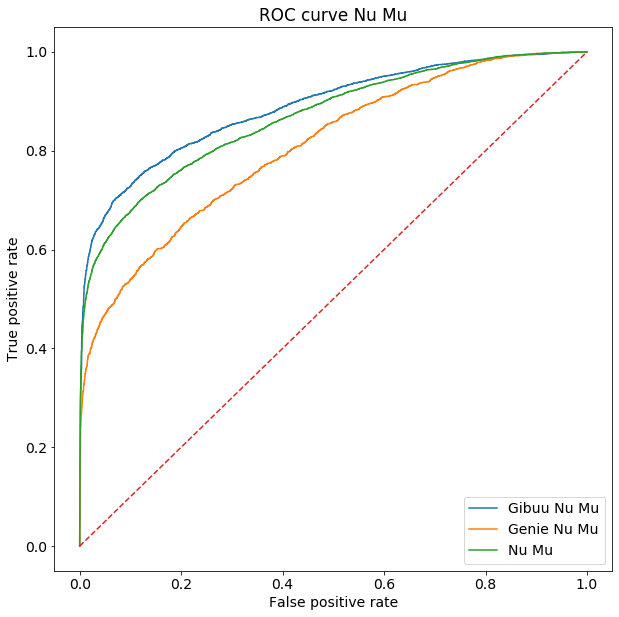

In [18]:
plt.figure(figsize=(10,10))

plt.plot(gibuu_nu_mu_fpr, gibuu_nu_mu_tpr, label = ' Gibuu Nu Mu')
plt.plot(genie_nu_mu_fpr, genie_nu_mu_tpr, label = 'Genie Nu Mu')
plt.plot(nu_mu_fpr, nu_mu_tpr, label = 'Nu Mu')

plt.legend(['Gibuu Nu Mu', 'Genie Nu Mu', 'Nu Mu'], loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Nu Mu')
plt.plot([0,1], [0,1], '--')

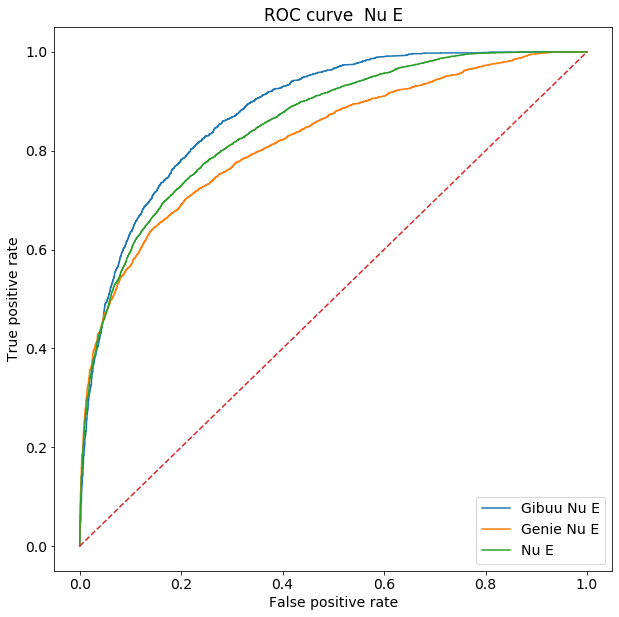

In [19]:
plt.figure(figsize=(10,10))

plt.plot(gibuu_nu_e_fpr, gibuu_nu_e_tpr, label = ' Gibuu Nu E')
plt.plot(genie_nu_e_fpr, genie_nu_e_tpr, label = 'Genie Nu E')
plt.plot(nu_e_fpr, nu_e_tpr, label = 'Nu Mu')

plt.legend(['Gibuu Nu E', 'Genie Nu E', 'Nu E'], loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve  Nu E')
plt.plot([0,1], [0,1], '--')

In [20]:
pkl.dump( gibuu_nu_mu_fpr, open( "gibuu_nu_mu_fpr_0_5.pkl", "wb" ) )
pkl.dump( gibuu_nu_mu_tpr, open( "gibuu_nu_mu_tpr_0_5.pkl", "wb" ) )
pkl.dump( genie_nu_mu_fpr, open( "genie_nu_mu_fpr_0_5.pkl", "wb" ) )
pkl.dump( genie_nu_mu_tpr, open( "genie_nu_mu_tpr_0_5.pkl", "wb" ) )

pkl.dump( gibuu_nu_e_fpr, open( "gibuu_nu_e_fpr_0_5.pkl", "wb" ) )
pkl.dump( gibuu_nu_e_tpr, open( "gibuu_nu_e_tpr_0_5.pkl", "wb" ) )
pkl.dump( genie_nu_e_fpr, open( "genie_nu_e_fpr_0_5.pkl", "wb" ) )
pkl.dump( genie_nu_e_tpr, open( "genie_nu_e_tpr_0_5.pkl", "wb" ) )